# Finite Width Effects

When the crack is relatively close in size to the width of a panel, we must consider finite-width effects.
For a center-cracked panel, the infinite-width formula is

$$K_I = \sigma \sqrt{\pi a} \tag{2.1}$$

While the finite-width formula is

$$K_I = \sigma \sqrt{\pi a} \sqrt{\sec (\pi a/W)} \tag{2.2a}$$
or
$$K_I = \sigma \sqrt{\pi a} \left[1.0 - 0.025\left(\frac{2a}{W}\right)^2 + 0.06\left(\frac{2a}{W}\right)^4\right]\sqrt{\sec (\pi a/W)} \tag{2.2b}$$

## Center-crack Comparison

We can compare plots of the two formulas for increasing width to see when we need the finite-width formula.

If we consider a fixed crack length, with varying width, we can normalize the two equations as
$$\frac{K_I}{\sigma \sqrt{\pi a}} = 1 \tag{2.1}$$
and
$$\frac{K_I}{\sigma \sqrt{\pi a}} = \sqrt{\sec (\pi a/W)} \tag{2.2a}$$
or
$$\frac{K_I}{\sigma \sqrt{\pi a}} = \left[1.0 - 0.025\left(\frac{2a}{W}\right)^2 + 0.06\left(\frac{2a}{W}\right)^4\right]\sqrt{\sec (\pi a/W)} \tag{2.2b}$$

In [3]:
import numpy as np
from matplotlib import pyplot as plt
#optional, for prettier default color scheme
import seaborn as sb
#make fonts bigger
sb.set(font_scale=1.5)
#only needed for "live notebooks" such as this demo
%matplotlib inline

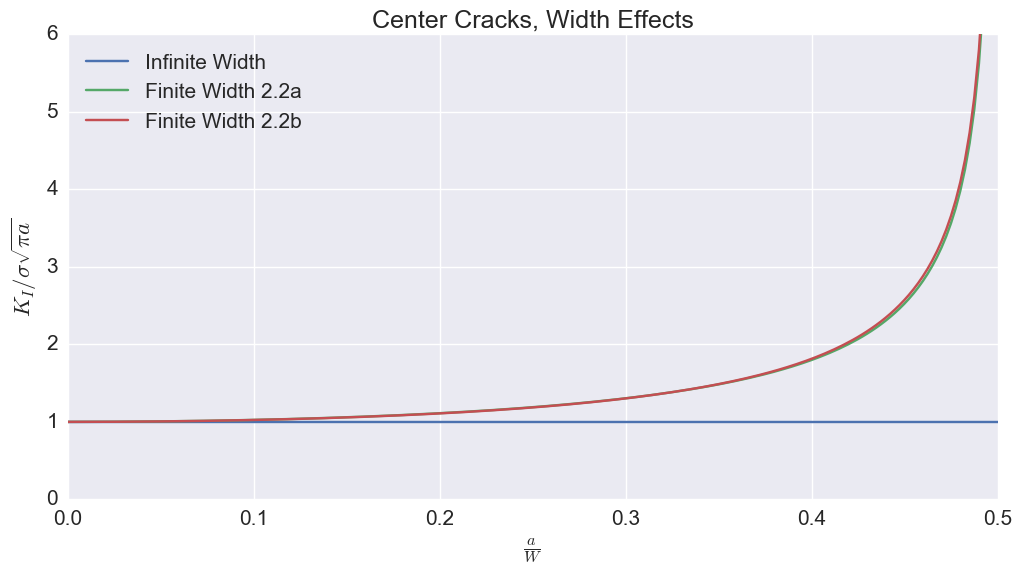

In [4]:
aw = np.linspace(0,.5,200)
plt.figure(figsize=(12,6))
plt.plot(aw,np.ones(len(aw)),label='Infinite Width')
plt.plot(aw,np.sqrt(1/np.cos(np.pi*aw)),label='Finite Width 2.2a')
plt.plot(aw,(1.0-.025*4*aw**2+.06*16*aw**4)*np.sqrt(1/np.cos(np.pi*aw)),label='Finite Width 2.2b')
plt.legend(loc='best')
plt.xlabel(r'$\frac{a}{W}$')
plt.ylabel(r'$K_I/\sigma\sqrt{\pi a}$')
plt.ylim([0,6])
plt.title('Center Cracks, Width Effects')

## Edge-crack Comparison

For edge cracks we have the formula
$$K_I = 1.122 \sigma \sqrt{\pi a} \tag{2.3}$$
for infinite-width panels and
$$K_I = \sigma \sqrt{\pi a}\left[1.122 - 0.231 \frac{a}{W} + 10.55 \left(\frac{a}{W}\right)^2 - 21.71 \left(\frac{a}{W}\right)^3 + 30.82 \left(\frac{a}{W}\right)^4\right] \tag{2.4a}$$
or
$$K_I = \sigma \sqrt{\pi a}\frac{0.752 + 2.02\frac{a}{W} + 0.37\left(1-\sin \frac{\pi a}{2W}\right)^3}{\cos \frac{\pi a}{2W}}\sqrt{\frac{2W}{\pi a} \tan \frac{\pi a}{2W}} \tag{2.4b}$$
for finite-widthe panels.

We normalize the same way to find

C:\Users\a723k873\AppData\Local\Continuum\Miniconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in divide
C:\Users\a723k873\AppData\Local\Continuum\Miniconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in multiply


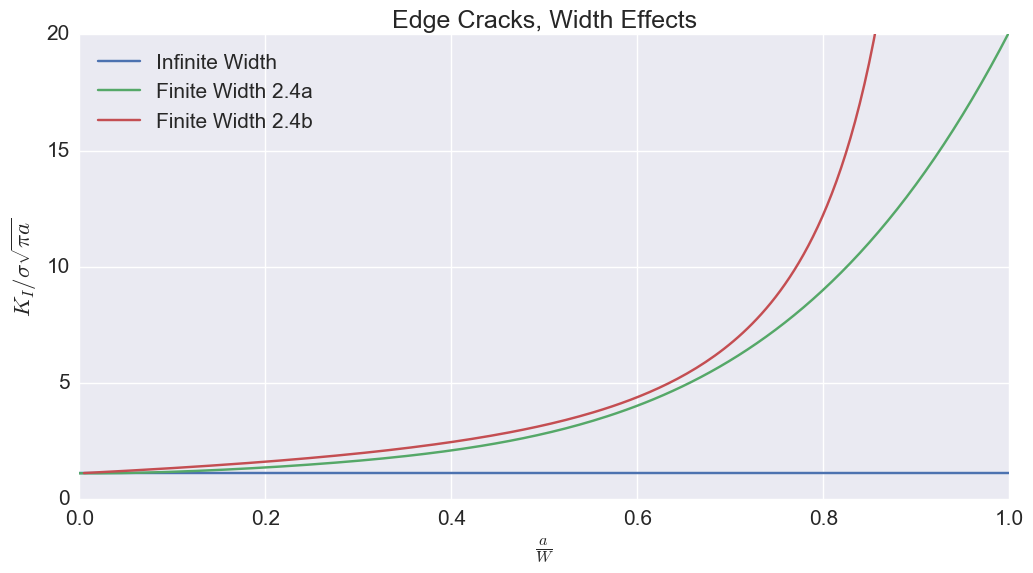

In [5]:
plt.figure(figsize=(12,6))
aw = np.linspace(0,1,200)
plt.plot(aw,1.122*np.ones(len(aw)),label='Infinite Width')
plt.plot(aw,1.122-.231*aw+10.55*aw**2-21.72*aw**3+30.39*aw**4,label='Finite Width 2.4a')
plt.plot(aw,(.752+2.02*aw+.37*(1-np.sin(np.pi/2*aw)**3))/(np.cos(np.pi/2*aw))*np.sqrt(2/np.pi/aw*np.tan(np.pi/2*aw)),label='Finite Width 2.4b')
plt.legend(loc='best')
plt.xlabel(r'$\frac{a}{W}$')
plt.ylabel(r'$K_I/\sigma\sqrt{\pi a}$')
plt.ylim([0,20])
plt.title('Edge Cracks, Width Effects')

# Surface Flaws

For example 2, use (2.15)

We have $a = 0.4$, $c = 0.6$, $t = 1.2$, and $b = 3$.

Since $a/c \le 1$:
$$M_1 = 1.13 - 0.09 \left(\frac{a}{c}\right)$$
$$M_2 = -0.52 + \frac{0.89}{0.2 + \frac{a}{c}}$$
$$M_3 = 0.5 - \frac{1}{0.65 + \frac{a}{c}} + 14 \left(1-\frac{a}{c}\right)^4$$
$$Q = 1 + 1.464\left(\frac{a}{c}\right)^{1.65}$$
$$f_\phi = \left(\left(\frac{a}{c}\right)^2 \cos^2 \phi + \sin^2 \phi \right)^{1/4}$$
$$g = 1 + \left(0.1 + 0.35 \left(\frac{a}{t}\right)^2\right)\left(1-\sin \phi\right)^2$$

In [6]:
phi = np.pi/2
a = 0.4
c = 0.6
t = 1.2
b = 3.0
M1 = 1.13 - 0.09*(a/c)
M2 = -0.52 + 0.89/(0.2+a/c)
M3 = 0.5 - 1/(0.65+a/c)+14*(1-a/c)**4
Q = 1+1.464*(a/c)**1.65
f_phi = ((a/c)**2*np.cos(phi)**2 + np.sin(phi)**2)**.25
g = 1 + (0.1 + 0.35*(a/t)**2)*(1-np.sin(phi))**2

We can now plug these values into (2.15c)

In [7]:
f_w = (1/np.cos(np.pi*c/2/b*np.sqrt(a/t)))**.5
Fs = (M1 + M2*(a/t)**2 + M3*(a/t)**4)**g*f_phi*f_w
beta = Fs*np.sqrt(1/Q)

Finally we substitute the stress to find the stress intensity factor

In [8]:
s = 20 #kpsi
KI = s*np.sqrt(np.pi*a)*beta
print KI

19.2297526729


The stress intensity factor for this geometry is $K_I = 19.2 \text{ ksi} \sqrt{\text{in.}}$

## Plotting

We know that the stress intensity factor varies with the angle, $\phi$. While we know the maximum should occur at $\phi = \pi/2$, we can plot it for all angles.

In [9]:
phi = np.linspace(0,np.pi/2)
f_phi = ((a/c)**2*np.cos(phi)**2 + np.sin(phi)**2)**.25
g = 1 + (0.1 + 0.35*(a/t)**2)*(1-np.sin(phi))**2
f_w = (1/np.cos(np.pi*c/2/b*np.sqrt(a/t)))**.5
Fs = (M1 + M2*(a/t)**2 + M3*(a/t)**4)**g*f_phi*f_w
beta = Fs*np.sqrt(1/Q)
KI = s*np.sqrt(np.pi*a)*beta

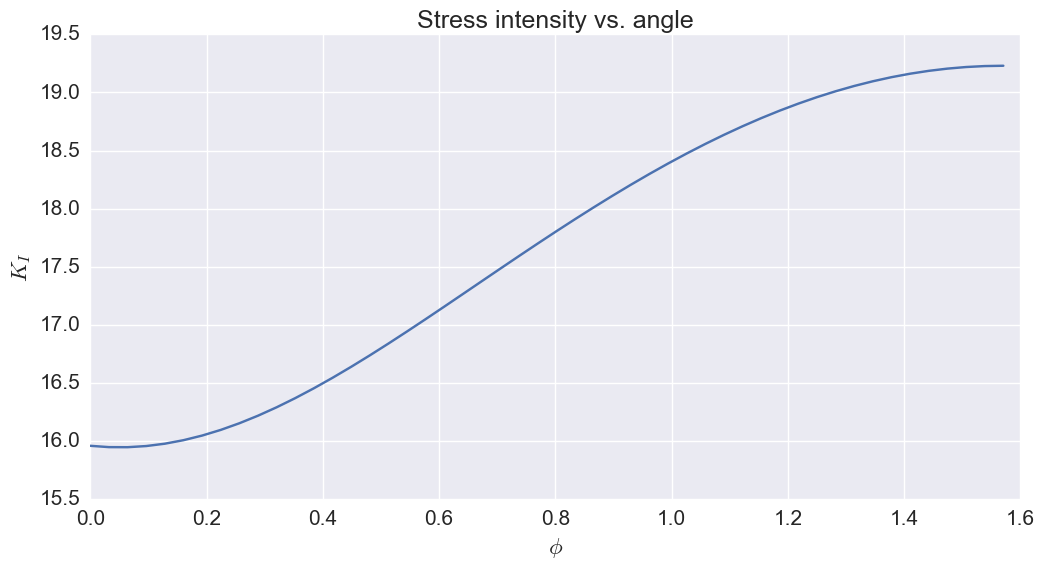

In [10]:
plt.figure(figsize=(12,6))
plt.plot(phi,KI)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$K_I$')
plt.title('Stress intensity vs. angle')